### ⚛️ Constructing a GHZ State

This circuit generates a **GHZ state** using 3 qubits:

\[
|\psi⟩ = \frac{1}{\sqrt{2}}(|000⟩ + |111⟩)
\]

**Steps:**
- `H` gate on qubit 0 creates a superposition: |0⟩ → (|0⟩ + |1⟩)/√2
- `CX` gates entangle qubits 1 and 2 with qubit 0
- `measure()` collapses the full entangled state

**Resulting circuit** creates a system where all qubits are either:
- **|000⟩** — all off
- **|111⟩** — all on

No in-between values like 001, 010, or 110 ever appear.

This is one of the most fundamental forms of **multipartite entanglement**.


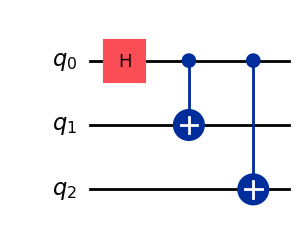

In [1]:
from qiskit import QuantumCircuit
 
# Create a circuit with a register of three qubits
circ = QuantumCircuit(3)
# H gate on qubit 0, putting this qubit in a superposition of |0> + |1>.
circ.h(0)
# A CX (CNOT) gate on control qubit 0 and target qubit 1 generating a Bell state.
circ.cx(0, 1)
# CX (CNOT) gate on control qubit 0 and target qubit 2 resulting in a GHZ state.
circ.cx(0, 2)
# Draw the circuit
circ.draw('mpl')

### 🧪 Simulating the GHZ Circuit

We used Qiskit 1.0+ best practices:
- Transpiled the circuit for the Aer simulator
- Submitted the job using `backend.run()`
- Visualized the result with `plot_histogram()`

**Output:**  
The histogram shows a ~50/50 distribution between **|000⟩** and **|111⟩**, confirming the expected GHZ state.

This proves that:
- All qubits are entangled
- Measurement on one affects the others instantly
- The system behaves non-classically

This is not just correlation — it's **quantum entanglement**.

Such states are the foundation of quantum teleportation, secure communication, and even theoretical models of quantum consciousness.


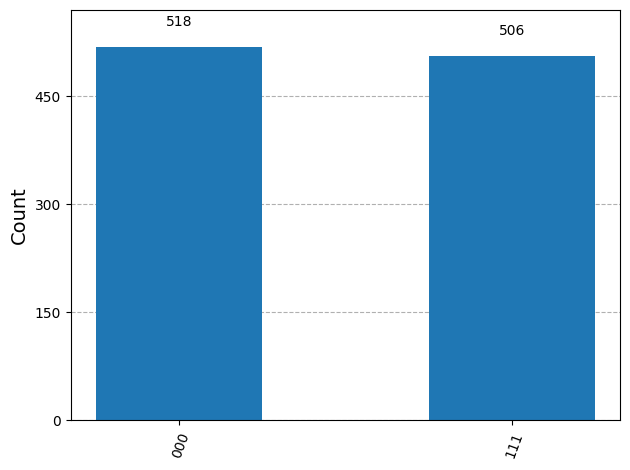

In [13]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from matplotlib import pyplot as plt
from IPython.display import display

qc = QuantumCircuit(3, 3)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.measure([0, 1, 2], [0, 1, 2])

backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, backend=backend, optimization_level=0)

job = backend.run(compiled, shots=1024)
result = job.result()
counts = result.get_counts()

hist = plot_histogram(counts)
display(hist)
